In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the datasets
wmt_df = pd.read_csv("WMT.csv")
train_df = pd.read_csv("train.csv")
features_df = pd.read_csv("features.csv")
stores_df = pd.read_csv("stores.csv")
test_df = pd.read_csv("test.csv")


dataframes = {
    "WMT Stock Prices": wmt_df,
    "Sales Performance (Train)": train_df,
    "Features": features_df,
    "Stores": stores_df,
    "Sales Performance (Test)": test_df
}

for name, df in dataframes.items():
    print(f"{name} - First 5 rows:")
    print(df.head(), "\n")


WMT Stock Prices - First 5 rows:
         Date      Open      High       Low     Close  Adj Close   Volume
0  1972-08-25  0.063477  0.064697  0.063477  0.064453   0.036175  2508800
1  1972-08-28  0.064453  0.064941  0.064209  0.064209   0.036038   972800
2  1972-08-29  0.063965  0.063965  0.063477  0.063477   0.035627  1945600
3  1972-08-30  0.063477  0.063477  0.062988  0.063477   0.035627   409600
4  1972-08-31  0.062988  0.062988  0.062500  0.062500   0.035079   870400 

Sales Performance (Train) - First 5 rows:
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False 

Features - First 5 rows:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN  

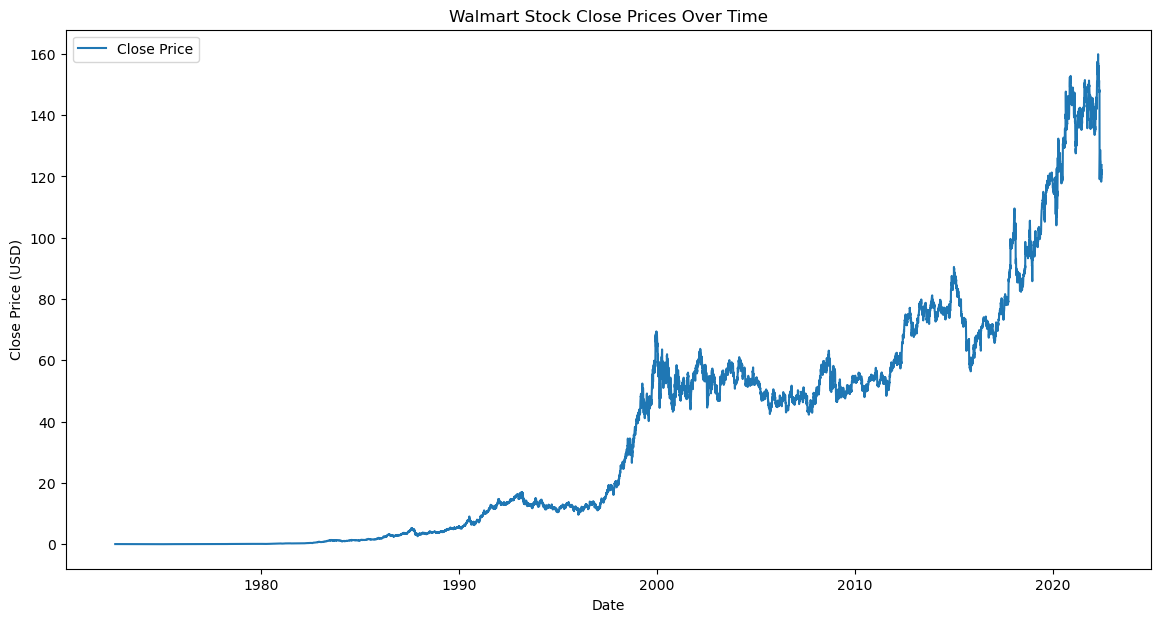

In [17]:
plt.figure(figsize=(14, 7))
plt.plot(wmt_df['Date'], wmt_df['Close'], label='Close Price')
plt.title('Walmart Stock Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()


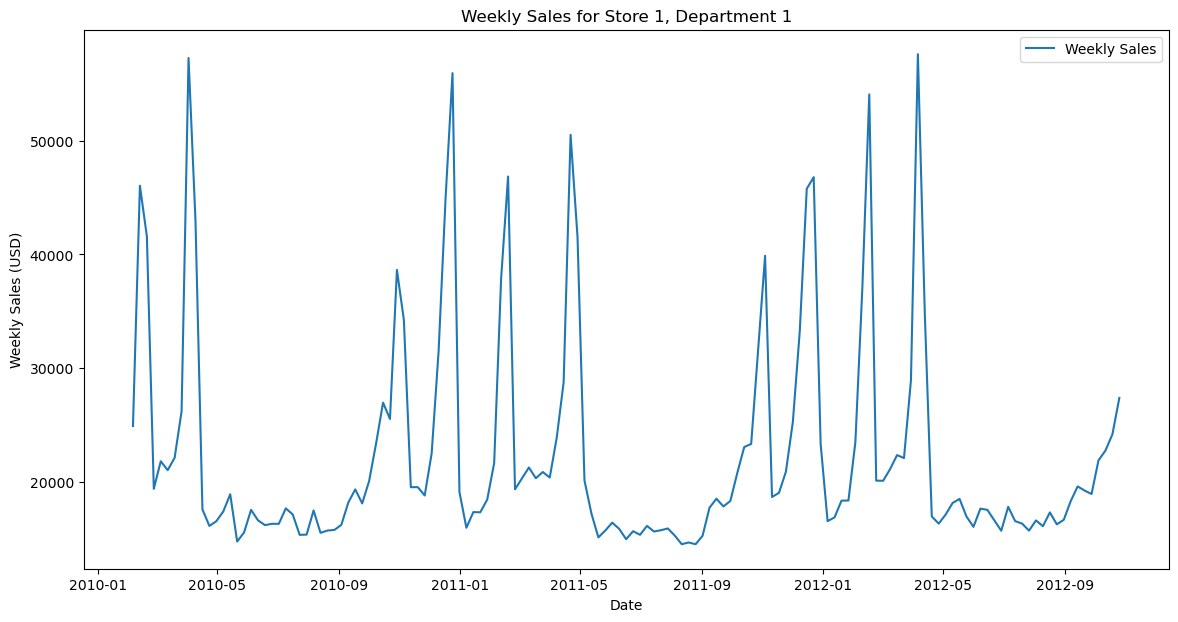

In [18]:

sales_example = train_df[(train_df['Store'] == 1) & (train_df['Dept'] == 1)]

plt.figure(figsize=(14, 7))
plt.plot(pd.to_datetime(sales_example['Date']), sales_example['Weekly_Sales'], label='Weekly Sales')
plt.title('Weekly Sales for Store 1, Department 1')
plt.xlabel('Date')
plt.ylabel('Weekly Sales (USD)')
plt.legend()
plt.show()


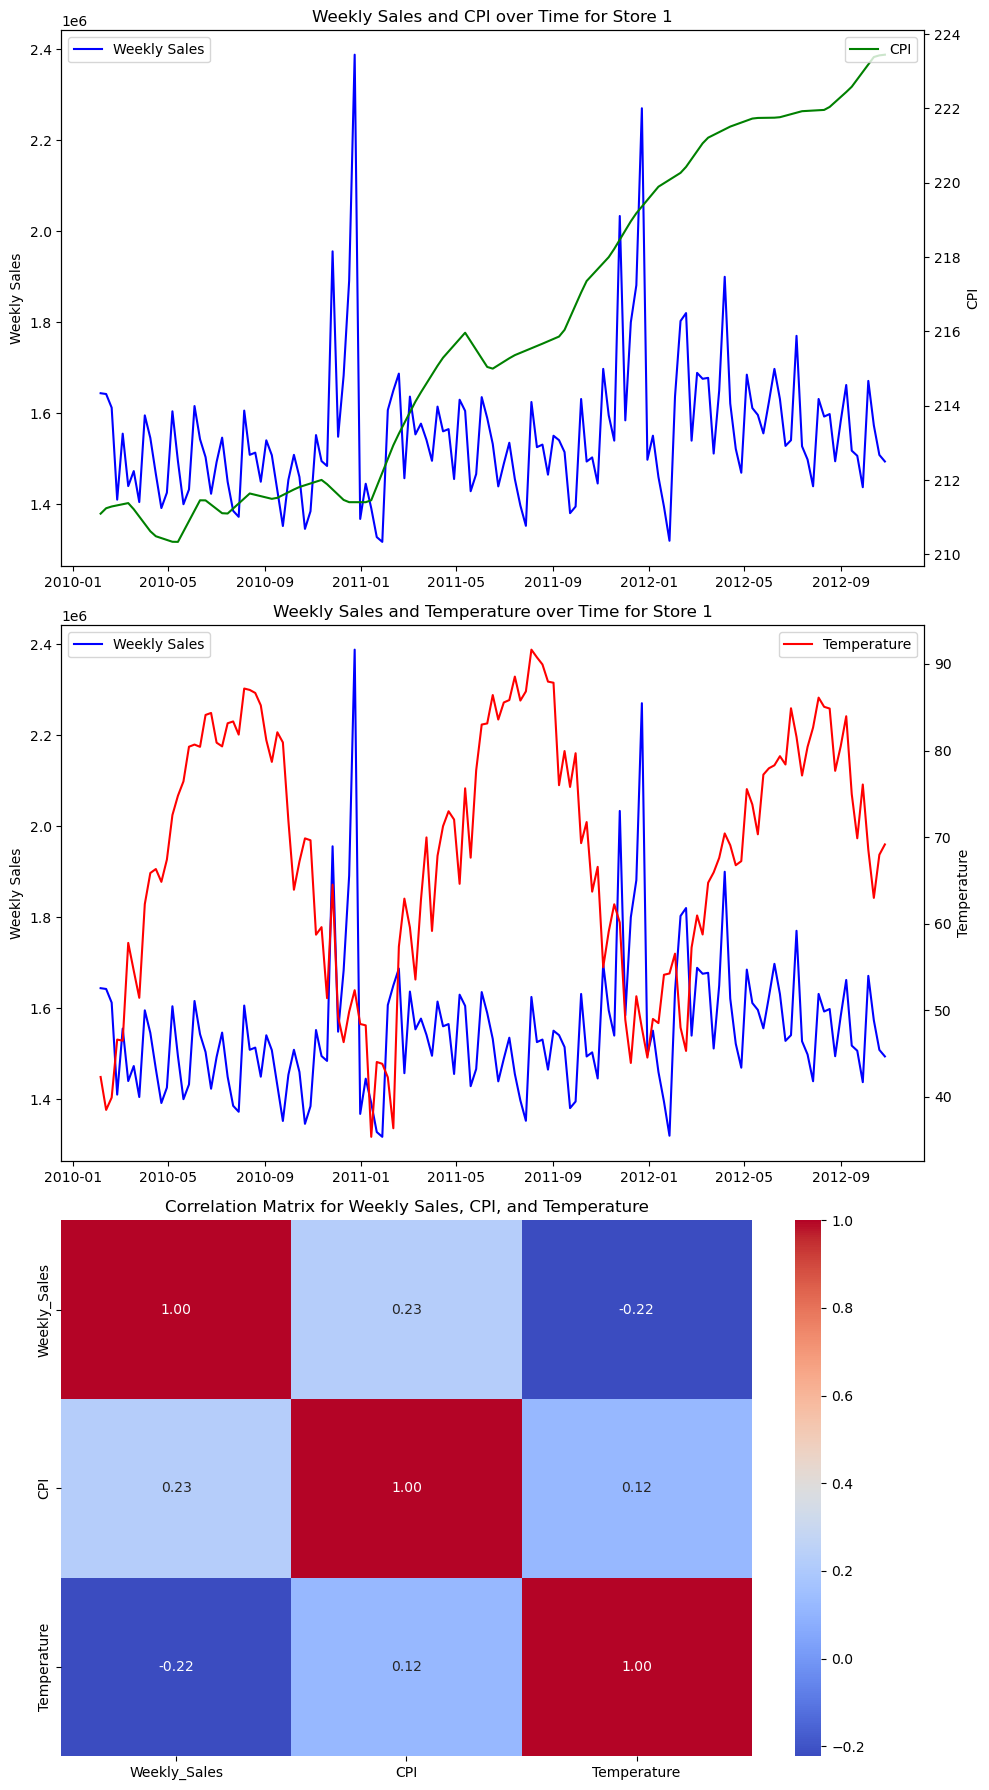

In [19]:
sales_agg = train_df[train_df['Store'] == 1].groupby('Date')['Weekly_Sales'].sum().reset_index()
sales_agg['Date'] = pd.to_datetime(sales_agg['Date'])

features_filtered = features_df[features_df['Store'] == 1][['Date', 'CPI', 'Temperature']]
features_filtered['Date'] = pd.to_datetime(features_filtered['Date'])
analysis_df = pd.merge(sales_agg, features_filtered, how='left', on='Date')
correlations = analysis_df[['Weekly_Sales', 'CPI', 'Temperature']].corr()

fig, axs = plt.subplots(3, 1, figsize=(10, 18))

axs[0].plot(analysis_df['Date'], analysis_df['Weekly_Sales'], label='Weekly Sales', color='blue')
axs[0].set_ylabel('Weekly Sales')
axs[0].legend(loc='upper left')
ax1 = axs[0].twinx()
ax1.plot(analysis_df['Date'], analysis_df['CPI'], label='CPI', color='green')
ax1.set_ylabel('CPI')
ax1.legend(loc='upper right')
axs[0].set_title('Weekly Sales and CPI over Time for Store 1')

axs[1].plot(analysis_df['Date'], analysis_df['Weekly_Sales'], label='Weekly Sales', color='blue')
axs[1].set_ylabel('Weekly Sales')
axs[1].legend(loc='upper left')
ax2 = axs[1].twinx()
ax2.plot(analysis_df['Date'], analysis_df['Temperature'], label='Temperature', color='red')
ax2.set_ylabel('Temperature')
ax2.legend(loc='upper right')
axs[1].set_title('Weekly Sales and Temperature over Time for Store 1')


sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", ax=axs[2])
axs[2].set_title('Correlation Matrix for Weekly Sales, CPI, and Temperature')
plt.tight_layout()
plt.show()


Temperature can be used since sales could fluctuate due to seasons.

We can see CPI increases following increase in weekly sales

price markdown period and how it affected sales

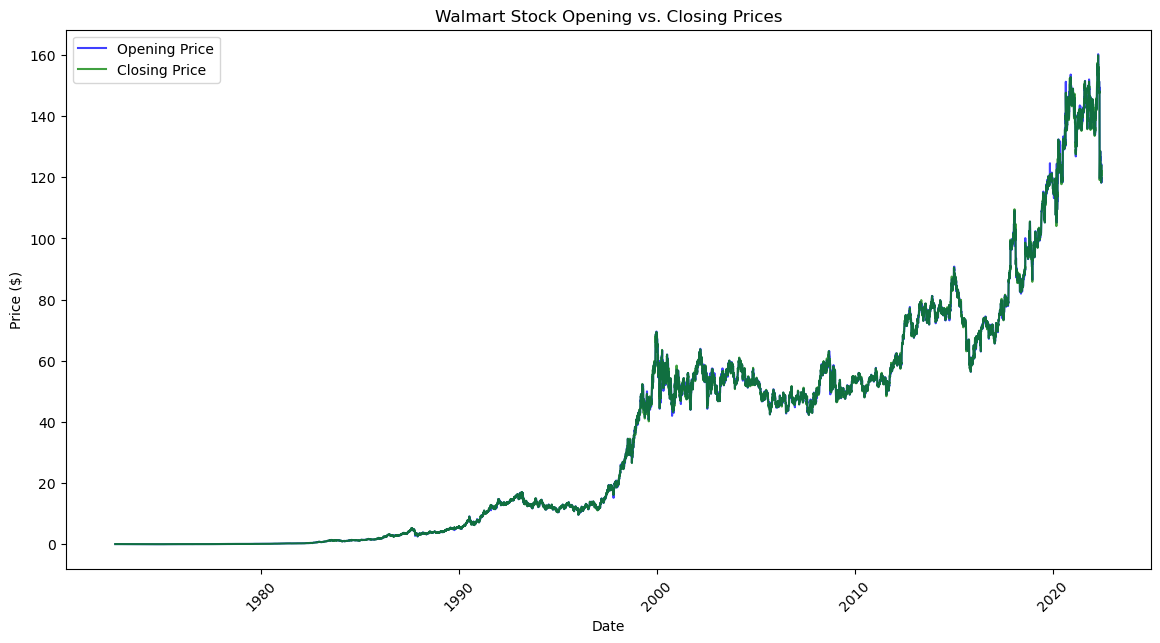

In [20]:
wmt_df['Date'] = pd.to_datetime(wmt_df['Date'])

plt.figure(figsize=(14, 7))
plt.plot(wmt_df['Date'], wmt_df['Open'], label='Opening Price', color='blue', alpha=0.75)
plt.plot(wmt_df['Date'], wmt_df['Close'], label='Closing Price', color='green', alpha=0.75)
plt.title('Walmart Stock Opening vs. Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

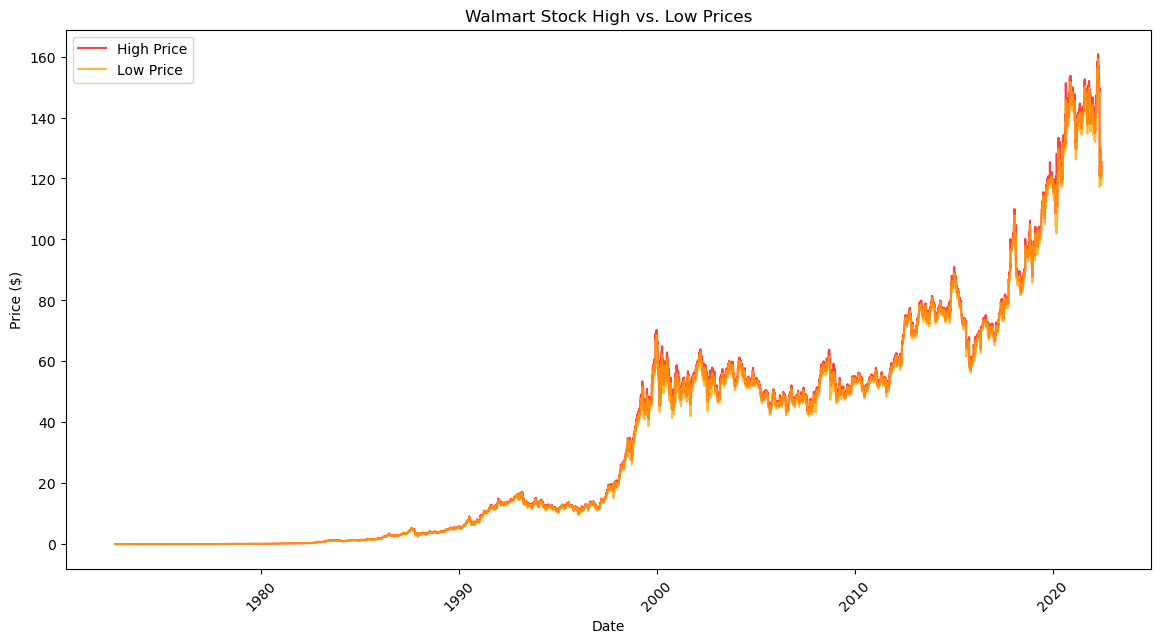

In [21]:
plt.figure(figsize=(14, 7))
plt.plot(wmt_df['Date'], wmt_df['High'], label='High Price', color='red', alpha=0.75)
plt.plot(wmt_df['Date'], wmt_df['Low'], label='Low Price', color='orange', alpha=0.75)
plt.title('Walmart Stock High vs. Low Prices')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


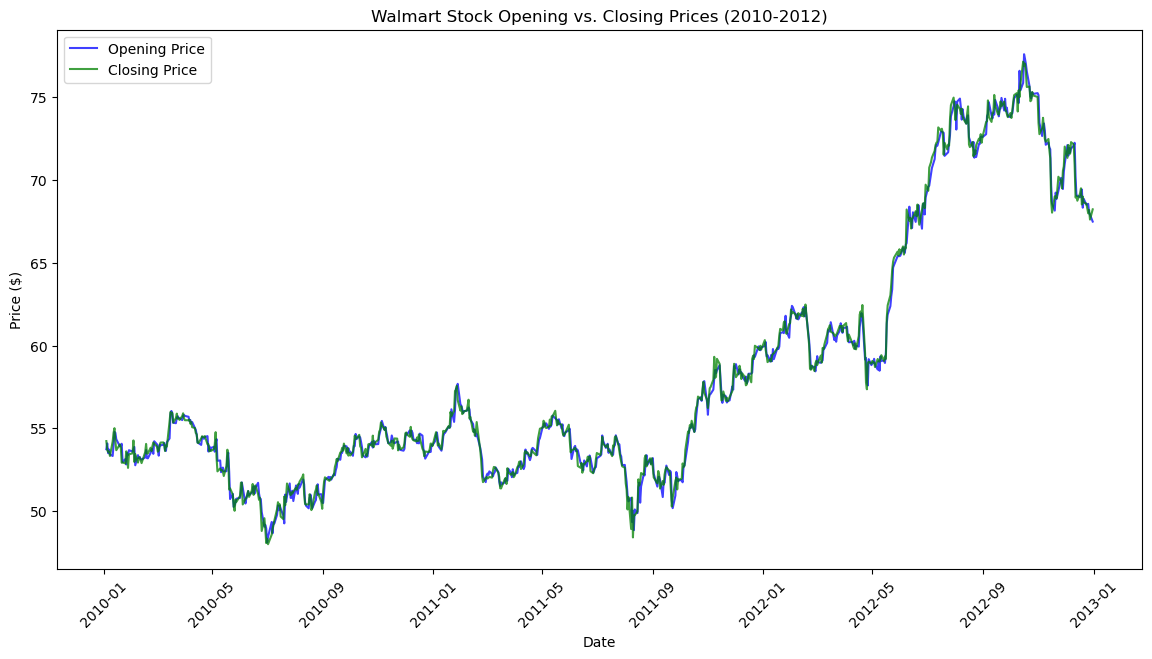

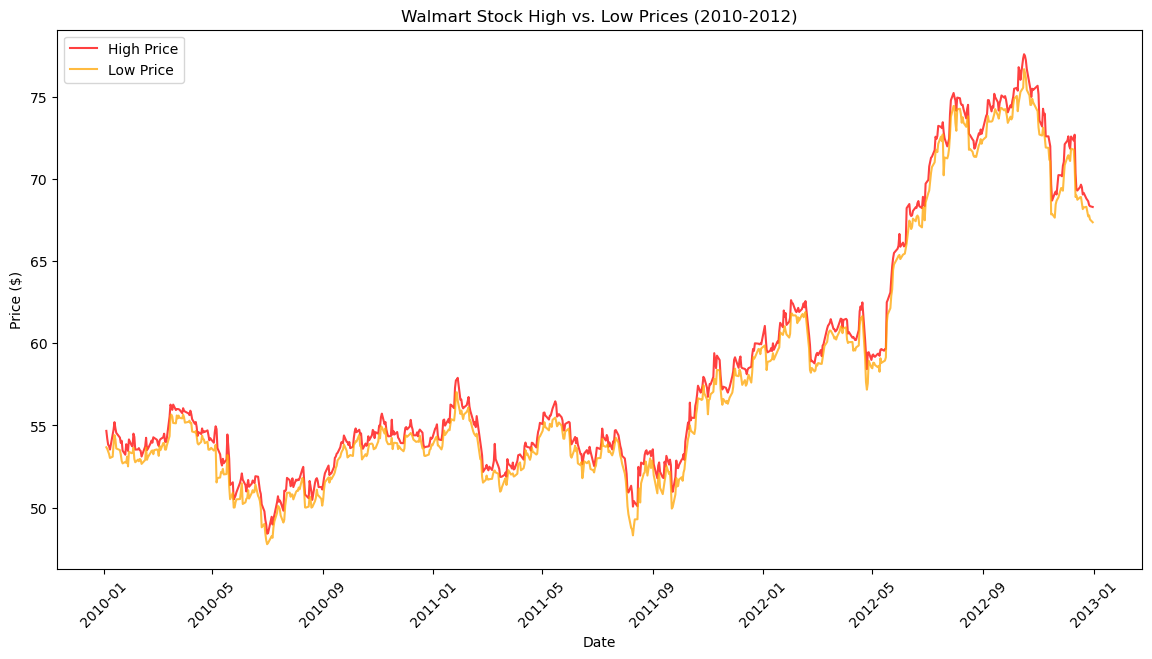

In [22]:
import matplotlib.pyplot as plt
import pandas as pd


wmt_df['Date'] = pd.to_datetime(wmt_df['Date'])
filtered_wmt_df = wmt_df[(wmt_df['Date'] >= pd.Timestamp('2010-01-01')) & (wmt_df['Date'] <= pd.Timestamp('2012-12-31'))]


plt.figure(figsize=(14, 7))
plt.plot(filtered_wmt_df['Date'], filtered_wmt_df['Open'], label='Opening Price', color='blue', alpha=0.75)
plt.plot(filtered_wmt_df['Date'], filtered_wmt_df['Close'], label='Closing Price', color='green', alpha=0.75)
plt.title('Walmart Stock Opening vs. Closing Prices (2010-2012)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(filtered_wmt_df['Date'], filtered_wmt_df['High'], label='High Price', color='red', alpha=0.75)
plt.plot(filtered_wmt_df['Date'], filtered_wmt_df['Low'], label='Low Price', color='orange', alpha=0.75)
plt.title('Walmart Stock High vs. Low Prices (2010-2012)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


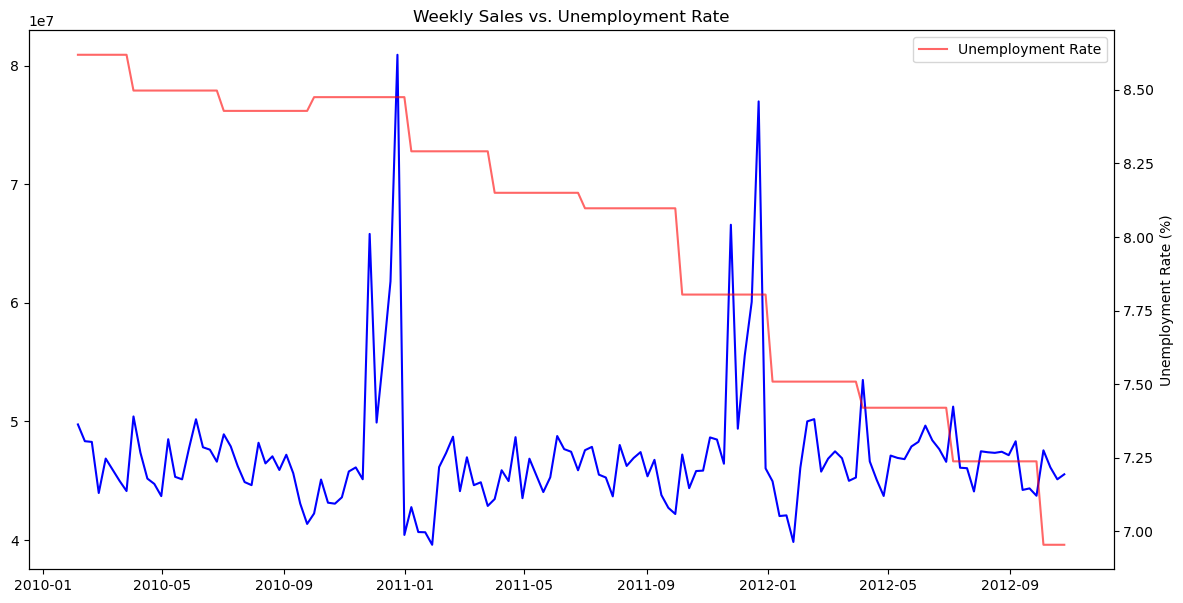

In [8]:
features_df['Date'] = pd.to_datetime(features_df['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])
agg_features_df = features_df.groupby('Date')['Unemployment'].mean().reset_index()
agg_train_df = train_df.groupby('Date')['Weekly_Sales'].sum().reset_index()
merged_df = pd.merge(agg_features_df, agg_train_df, on='Date')


plt.figure(figsize=(14, 7))
plt.plot(merged_df['Date'], merged_df['Weekly_Sales'], label='Weekly Sales', color='blue')
ax2 = plt.twinx()
ax2.plot(merged_df['Date'], merged_df['Unemployment'], label='Unemployment Rate', color='red', alpha=0.6)

plt.title('Weekly Sales vs. Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')
ax2.set_ylabel('Unemployment Rate (%)')

plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


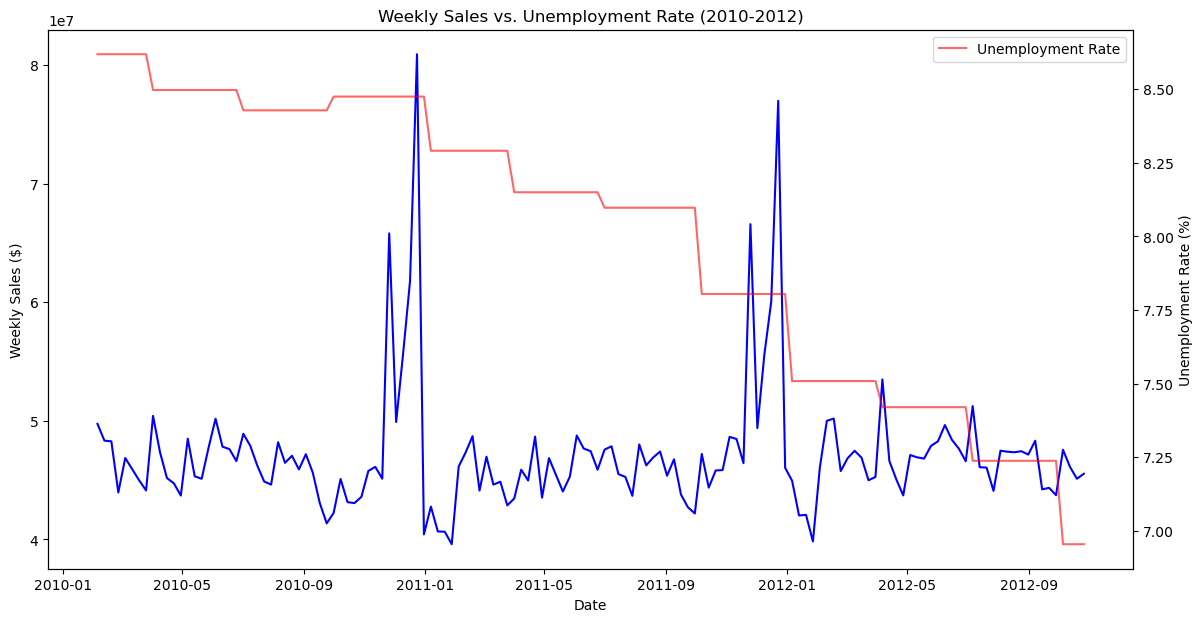

In [9]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

filtered_merged_df = merged_df[(merged_df['Date'] >= pd.Timestamp('2010-01-01')) & (merged_df['Date'] <= pd.Timestamp('2012-12-31'))]
plt.figure(figsize=(14, 7))

plt.plot(filtered_merged_df['Date'], filtered_merged_df['Weekly_Sales'], label='Weekly Sales', color='blue')
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')

ax2 = plt.gca().twinx()
ax2.plot(filtered_merged_df['Date'], filtered_merged_df['Unemployment'], label='Unemployment Rate', color='red', alpha=0.6)
ax2.set_ylabel('Unemployment Rate (%)')

plt.title('Weekly Sales vs. Unemployment Rate (2010-2012)')
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


In [42]:
import pandas as pd

features_df = pd.read_csv('features.csv')
train_df = pd.read_csv('train.csv')

features_df['Date'] = pd.to_datetime(features_df['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])

features_df['YearWeek'] = features_df['Date'].dt.strftime('%Y-%U')
train_df['YearWeek'] = train_df['Date'].dt.strftime('%Y-%U')


agg_features = features_df.groupby('YearWeek')['Unemployment'].mean().reset_index()
agg_sales = train_df.groupby('YearWeek')['Weekly_Sales'].sum().reset_index()

merged_df = pd.merge(agg_sales, agg_features, on='YearWeek')


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = merged_df[['Unemployment']]
y = merged_df['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f'R² Score: {r2}')


R² Score: -0.06840749767354937


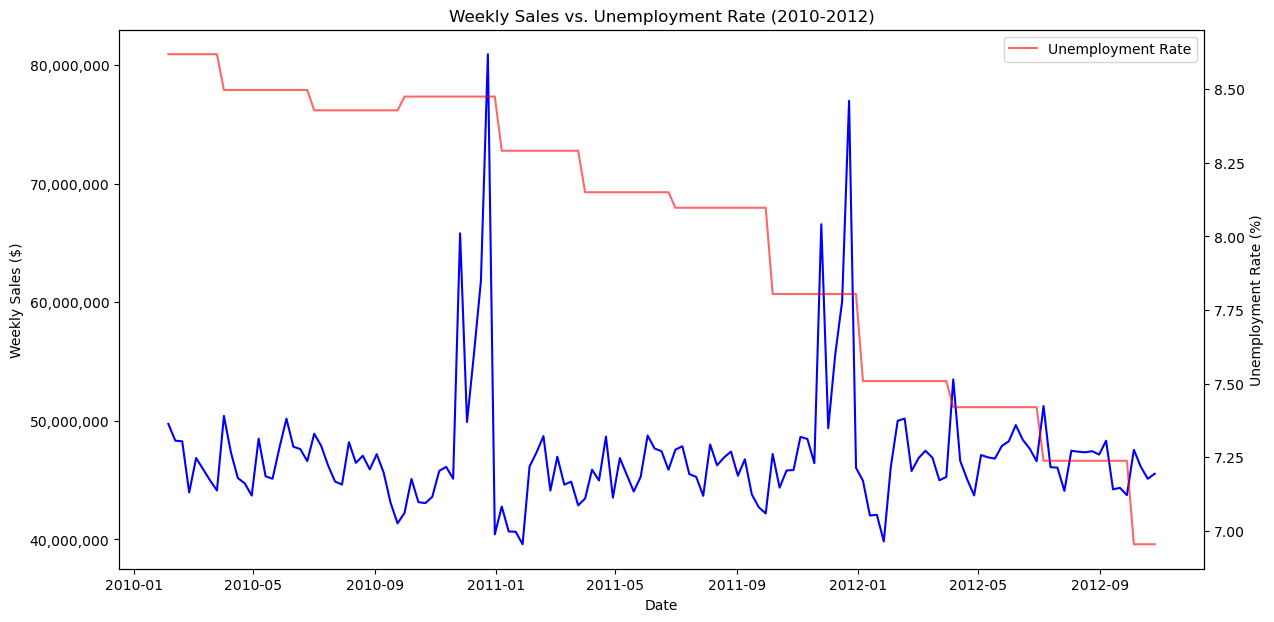

In [44]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(14, 7))

plt.plot(filtered_merged_df['Date'], filtered_merged_df['Weekly_Sales'], label='Weekly Sales', color='blue')
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')

plt.gca().get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax2 = plt.gca().twinx()
ax2.plot(filtered_merged_df['Date'], filtered_merged_df['Unemployment'], label='Unemployment Rate', color='red', alpha=0.6)
ax2.set_ylabel('Unemployment Rate (%)')

plt.title('Weekly Sales vs. Unemployment Rate (2010-2012)')
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


In [45]:
features_df = pd.read_csv('features.csv')
train_df = pd.read_csv('train.csv')


features_df_filtered = features_df.dropna(subset=['CPI'])


features_df_filtered['Date'] = pd.to_datetime(features_df_filtered['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])

agg_features_df = features_df_filtered.groupby('Date')['CPI'].mean().reset_index()


agg_sales_df = train_df.groupby('Date')['Weekly_Sales'].sum().reset_index()


merged_df = pd.merge(agg_sales_df, agg_features_df, on='Date')


merged_df.head()


C:\Users\longa\AppData\Local\Temp\ipykernel_17608\1985296544.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df_filtered['Date'] = pd.to_datetime(features_df_filtered['Date'])


,Date,Weekly_Sales,CPI
0,2010-02-05,49750740.50,167.730885
1,2010-02-12,48336677.63,167.825608
2,2010-02-19,48276993.78,167.871686
3,2010-02-26,43968571.13,167.909657
4,2010-03-05,46871470.30,167.947628


In [46]:
import pandas as pd


features_df = pd.read_csv('features.csv')
train_df = pd.read_csv('train.csv')

features_df_filtered = features_df.dropna(subset=['CPI']).copy()
features_df_filtered['Date'] = pd.to_datetime(features_df_filtered['Date'])
train_df['Date'] = pd.to_datetime(train_df['Date'])

agg_features_df = features_df_filtered.groupby('Date')['CPI'].mean().reset_index()
agg_sales_df = train_df.groupby('Date')['Weekly_Sales'].sum().reset_index()
merged_df = pd.merge(agg_sales_df, agg_features_df, on='Date')
print(merged_df.head())


        Date  Weekly_Sales         CPI
0 2010-02-05   49750740.50  167.730885
1 2010-02-12   48336677.63  167.825608
2 2010-02-19   48276993.78  167.871686
3 2010-02-26   43968571.13  167.909657
4 2010-03-05   46871470.30  167.947628


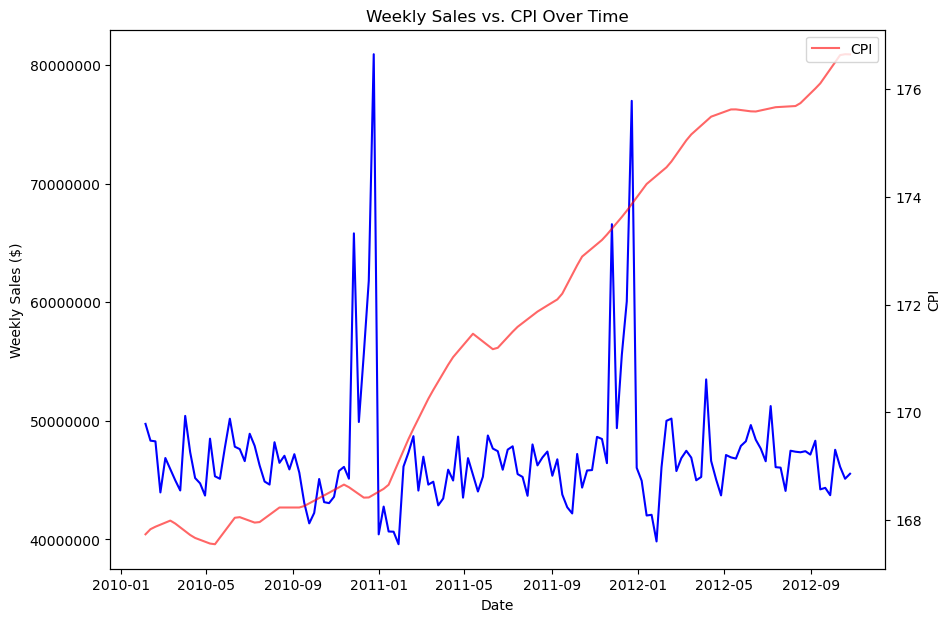

In [47]:
plt.figure(figsize=(10, 7))
plt.plot(merged_df['Date'], merged_df['Weekly_Sales'], label='Weekly Sales', color='blue')
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')

plt.ticklabel_format(style='plain', axis='y')  

ax2 = plt.twinx()
ax2.plot(merged_df['Date'], merged_df['CPI'], label='CPI', color='red', alpha=0.6)
ax2.set_ylabel('CPI')

plt.title('Weekly Sales vs. CPI Over Time')
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


In [48]:
merged_cpi_close_df = merged_cpi_close_df[merged_cpi_close_df['Date'] <= '2013-01-01']

plt.figure(figsize=(10, 7))
plt.plot(merged_cpi_close_df['Date'], merged_cpi_close_df['Close'], label='Closing Prices', color='green')
plt.xlabel('Date')
plt.ylabel('Closing Prices ($)')

ax2 = plt.twinx()
ax2.plot(merged_cpi_close_df['Date'], merged_cpi_close_df['CPI'], label='CPI', color='red', alpha=0.6)
ax2.set_ylabel('CPI')

plt.title('Closing Prices vs. CPI Over Time')
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

NameError: name 'merged_cpi_close_df' is not defined

In [ ]:
correlation_close_cpi = merged_cpi_close_df['Close'].corr(merged_cpi_open_df['CPI'])
correlation_close_cpi

In [28]:
agg_opening_prices_df = closing_prices_df.groupby('Date')['Open'].mean().reset_index()

agg_opening_prices_df = agg_opening_prices_df[agg_opening_prices_df['Date'] <= '2013-01-01']


merged_cpi_open_df = pd.merge(agg_opening_prices_df, agg_cpi_df, on='Date')

plt.figure(figsize=(10, 7))
plt.plot(merged_cpi_open_df['Date'], merged_cpi_open_df['Open'], label='Opening Prices', color='orange')
plt.xlabel('Date')
plt.ylabel('Opening Prices ($)')


ax2 = plt.twinx()
ax2.plot(merged_cpi_open_df['Date'], merged_cpi_open_df['CPI'], label='CPI', color='red', alpha=0.6)
ax2.set_ylabel('CPI')

plt.title('Opening Prices vs. CPI Over Time')
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()



NameError: name 'closing_prices_df' is not defined

In [ ]:
correlation_open_cpi = merged_cpi_open_df['Open'].corr(merged_cpi_open_df['CPI'])
correlation_open_cpi

In [ ]:
agg_high_prices_df = closing_prices_df.groupby('Date')['High'].mean().reset_index()
agg_high_prices_df = agg_high_prices_df[agg_high_prices_df['Date'] <= '2013-01-01']
merged_cpi_high_df = pd.merge(agg_high_prices_df, agg_cpi_df, on='Date')

plt.figure(figsize=(10, 7))
plt.plot(merged_cpi_high_df['Date'], merged_cpi_high_df['High'], label='High Prices', color='purple')
plt.xlabel('Date')
plt.ylabel('High Prices ($)')

ax2 = plt.twinx()
ax2.plot(merged_cpi_high_df['Date'], merged_cpi_high_df['CPI'], label='CPI', color='red', alpha=0.6)
ax2.set_ylabel('CPI')

plt.title('High Prices vs. CPI Until January 2013')
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


In [38]:
correlation_high_cpi = merged_cpi_high_df['High'].corr(merged_cpi_high_df['CPI'])
correlation_high_cpi

NameError: name 'merged_cpi_high_df' is not defined

In [37]:
agg_low_prices_df = closing_prices_df.groupby('Date')['Low'].mean().reset_index()
agg_low_prices_df = agg_low_prices_df[agg_low_prices_df['Date'] <= '2013-01-01']
merged_cpi_low_df = pd.merge(agg_low_prices_df, agg_cpi_df, on='Date')


plt.figure(figsize=(10, 7))
plt.plot(merged_cpi_low_df['Date'], merged_cpi_low_df['Low'], label='Low Prices', color='blue')
plt.xlabel('Date')
plt.ylabel('Low Prices ($)')


ax2 = plt.twinx()
ax2.plot(merged_cpi_low_df['Date'], merged_cpi_low_df['CPI'], label='CPI', color='red', alpha=0.6)
ax2.set_ylabel('CPI')

plt.title('Low Prices vs. CPI Until January 2013')
plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


NameError: name 'closing_prices_df' is not defined

In [41]:
correlation = merged_cpi_low_df['Low'].corr(merged_cpi_low_df['CPI'])
correlation

NameError: name 'merged_cpi_low_df' is not defined